In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/output/output.xlsx
/kaggle/input/output-v2/output_v2.xlsx
/kaggle/input/values-office/values_office.xlsx


In [10]:
data = pd.read_excel('/kaggle/input/output-v2/output_v2.xlsx',
sheet_name=0,
header=0,
index_col=[0],
keep_default_na=True
)



colist=['Tin', 'Tout', 'humidity', 'detected_motions', 'power',
      'office_CO2_concentration', 'door', 'CO2_corridor',
       'acoustic_pressure']




#x_train, x_test, y_train, y_test = train_test_split(x, lab, test_size = 0.3)





BaseLine/ Naive Forecast Model

In [11]:
from numpy import array


def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [12]:
def split_future(future,n_steps):
    v= list()
    for k in range(n_steps,len(future)):
        s = list()
        for i in range(n_steps):
            if (k+i)>len(future)-1:
                break
            
            s.append(future[k+i])
       
       
            
            
        v.append(s)
    for k in v:
        
        while len(k) !=len(v[0]):
            k.append(-10)
    
    return(array(v))



In [13]:
print(split_future([0,3,4,6,7,9,8,10,15,3,2],3))
print(type(split_future([0,3,4,6,7,9,8,10,15,3,2],3)[0]))

[[  6   7   9]
 [  7   9   8]
 [  9   8  10]
 [  8  10  15]
 [ 10  15   3]
 [ 15   3   2]
 [  3   2 -10]
 [  2 -10 -10]]
<class 'numpy.ndarray'>


In [14]:
print(split_sequence([0,3,4,6,7,9,8,10,15,3,2],3)[0])
print(type(split_sequence([0,3,4,6,7,9,8,10,15,3,2],3)[0]))

[[ 0  3  4]
 [ 3  4  6]
 [ 4  6  7]
 [ 6  7  9]
 [ 7  9  8]
 [ 9  8 10]
 [ 8 10 15]
 [10 15  3]]
<class 'numpy.ndarray'>


In [15]:
print(split_future(data.calendrier,12*12))

[[ -1  -1  -1 ...  -1  -1  -1]
 [ -1  -1  -1 ...  -1  -1  -1]
 [ -1  -1  -1 ...  -1  -1  -2]
 ...
 [ -1  -1  -1 ... -10 -10 -10]
 [ -1  -1 -10 ... -10 -10 -10]
 [ -1 -10 -10 ... -10 -10 -10]]


In [16]:
futur_feat = split_future(data.calendrier,12*12*4)

In [17]:
# define input sequence

n_steps = 4*12*12
# split into samples
X, y = split_sequence(data.label, n_steps)
data['calendar'] =data['label']
future = []

    
T, yt = split_sequence(data.calendrier, n_steps)

print(T)



[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -2]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [18]:
print(X[0])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.06
 0.   0.   0.   0.02 0.   0.02 0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

In [19]:
# summarize the data
#for i in range(len(X)):
     #print(X[i], y[i])
fut = futur_feat
print(fut)

n_features = 2
print(fut[0])
print('t')
print(fut.shape)
X = X.reshape((X.shape[0], X.shape[1]))
fut = fut.reshape((fut.shape[0], fut.shape[1]))
S=np.empty((X.shape[0],X.shape[1],n_features))
print(S)
S[:,:,0]=X
#S[:,:,1]=T
S[:,:,1]=fut

print(S[0])


[[ -1  -2  -1 ...  -1  -1  -1]
 [ -2  -1  -1 ...  -1  -1  -1]
 [ -1  -1  -1 ...  -1  -1  -1]
 ...
 [ -1  -1  -1 ... -10 -10 -10]
 [ -1  -1 -10 ... -10 -10 -10]
 [ -1 -10 -10 ... -10 -10 -10]]
[-1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -

In [20]:
S.shape

(52397, 288, 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 160       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 71s 57ms/step - loss: 0.0706 - accuracy: 0.3466
Epoch 2/5
1250/1250 [==============================] - 71s 57ms/step - loss: 0.0522 - accuracy: 0.3480
Epoch 3/5
1250/1250 [==============================] - 71s 57ms/step - loss: 0.0515 - accuracy: 0.3480
Epoch 4/5
1250/1250 [==============================] - 72s 58ms/step - loss: 0.0511 - accuracy: 0.3481
Epoch 5/5
1250/1250 [==============================] - 71s 57ms/step - loss: 0.0510 - accuracy: 0.3481
0.716

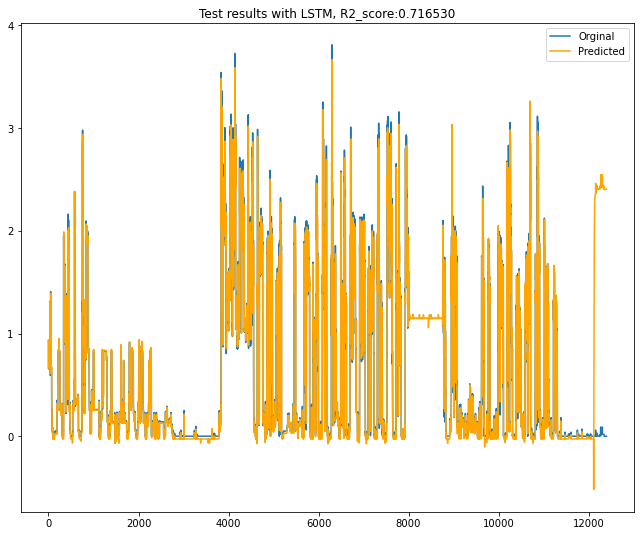

In [21]:

from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from sklearn.metrics import r2_score

#
#

model = Sequential()
model.add(LSTM(5, activation='relu', input_shape=(n_steps, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()



S.shape

trainx = S[0:40000]
trainy = y[0:40000]
testx = S[40000:]
testy = y[40000:]

network = model.fit(trainx, trainy, epochs=(5))

yhat = model.predict(testx, verbose=0)
plt.figure(figsize=(11, 9))
plt.plot(testy, label='Orginal')
plt.plot(yhat, label='Predicted', color='Orange')
plt.legend(loc='best')
plt.title('Test results with LSTM, R2_score:%f' % r2_score(testy, yhat))
print(r2_score(testy, yhat))
plt.show()

0.8763012616506096


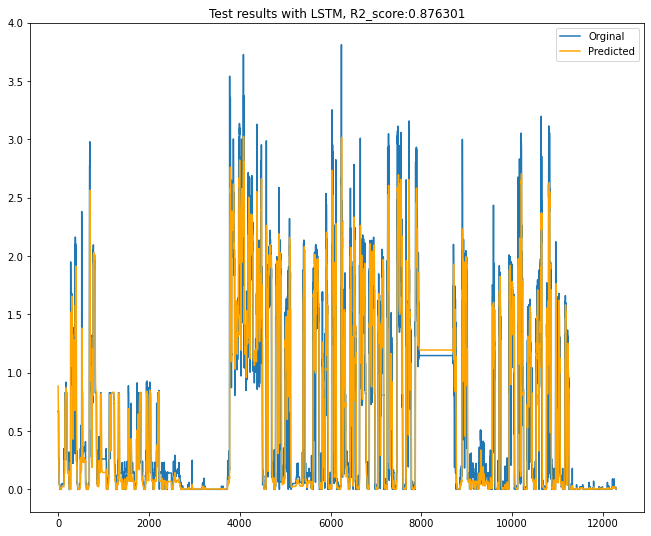

In [29]:

plt.figure(figsize=(11, 9))
plt.plot(testy[0:-50], label='Orginal')
plt.plot(yhat[0:-50], label='Predicted', color='Orange')
plt.legend(loc='best')
plt.title('Test results with LSTM, R2_score:%f' % r2_score(testy[0:-50], yhat[0:-50]))
print(r2_score(testy[0:-50], yhat[0:-50]))
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1252/1252 [==============================] - 106s 85ms/step - loss: 10.1365 - accuracy: 0.3368
Epoch 2/5
1252/1252 [==============================] - 106s 85ms/step - loss: 0.3357 - accuracy: 0.3272
Epoch 3/5
1252/1252 [==============================] - 105s 84ms/step - loss: 0.2019 - accuracy: 0.3405
Epoch 4/5
1252/1252 [==============================] - 106s 84ms/step - loss: 0.1229 - accuracy: 0.3420
Epoch 5/5
1252/1252 [==============================] - 105s 84ms/step - loss: 0.1085 - accuracy: 0.34

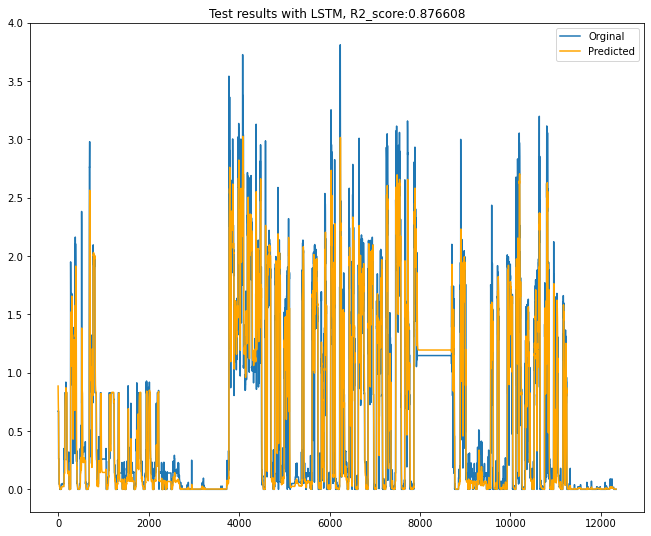

In [25]:
X, y = split_sequence(data.label, n_steps)


# summarize the data
#for i in range(len(X)):
     #print(X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, RepeatVector
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from sklearn.metrics import r2_score

#
#

model = Sequential()
model.add(LSTM(5, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()



X.shape

trainx = X[0:40060]
trainy = y[0:40060]
testx = X[40060:]
testy = y[40060:]

network = model.fit(trainx, trainy, epochs=(5))

yhat = model.predict(testx, verbose=0)
plt.figure(figsize=(11, 9))
plt.plot(testy, label='Orginal')
plt.plot(yhat, label='Predicted', color='Orange')
plt.legend(loc='best')
plt.title('Test results with LSTM, R2_score:%f' % r2_score(testy, yhat))
print(r2_score(testy, yhat))
plt.show()

In [ ]:
n_steps = 12*12*2
X, y = split_sequence(data.label, n_steps)


# summarize the data
#for i in range(len(X)):
     #print(X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, RepeatVector
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from sklearn.metrics import r2_score

#
#

model = Sequential()
model.add(LSTM(5, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()



X.shape

trainx = X[0:30060]
trainy = y[0:30060]
testx = X[30060:]
testy = y[30060:]

network = model.fit(trainx, trainy, epochs=(2))

yhat = model.predict(testx, verbose=0)
plt.figure(figsize=(11, 9))
plt.plot(testy, label='Orginal')
plt.plot(yhat, label='Predicted', color='Orange')
plt.legend(loc='best')
plt.title('Test results with LSTM, R2_score:%f' % r2_score(testy, yhat))
print(r2_score(testy, yhat))
plt.show()